# Descripción del proyecto
El presente proyecto tiene como objetivo analizar los datos de los clientes de la cadena de gimnasios Model Fitness, con el propósito de identificar target groups y desarrollar propuestas de marketing estratégicas basadas en los resultados obtenidos.

## Inicialización 

En la primera parte de este trabajo se llevarán a cabo los siguientes procesos:
1. Cargar las librerías necesarias para el análisis.
2. Importar el conjunto de datos.
3. Revisar los datos para proceder a su limpieza y enriquecimiento, en caso de ser necesario.


In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
gym = pd.read_csv("gym_churn_us.csv")

In [4]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
gym.columns = gym.columns.str.lower()

In [6]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [7]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
gym.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [9]:
gym.duplicated().sum()

np.int64(0)

### Resultados
Se analizan los datos de la tabla 'gym', compuesta por 4,000 filas y 14 columnas. Dado que los nombres de las columnas están en mayúsculas, se estandarizan a minúsculas para facilitar su manipulación. Tras aplicar los métodos de validación correspondientes, se verifica que los datos no contienen valores nulos, ausentes ni duplicados.

## Exploración de datos
Esta etapa tiene por objetivo visibilizar relaciones entre los datos y aquella información que resulte más pertinente para los modelos de automatización.

In [10]:
#Comparar datos de personas de personas con y sin suscripción activa

gym_comparison = gym.groupby('churn').mean()

gym_comparison

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [11]:
#Extraer lista con nombres de columnas 
variables = gym.columns
variables

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

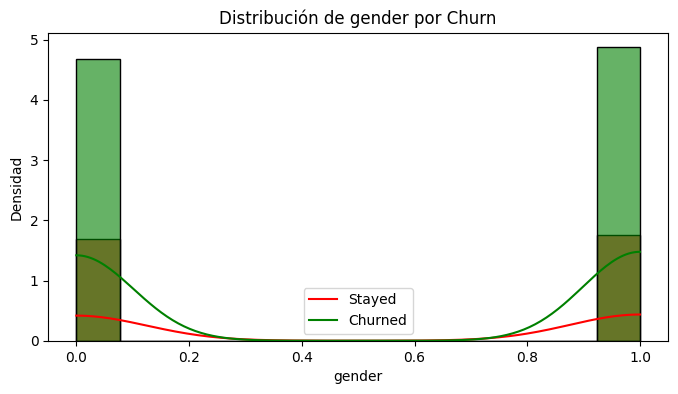

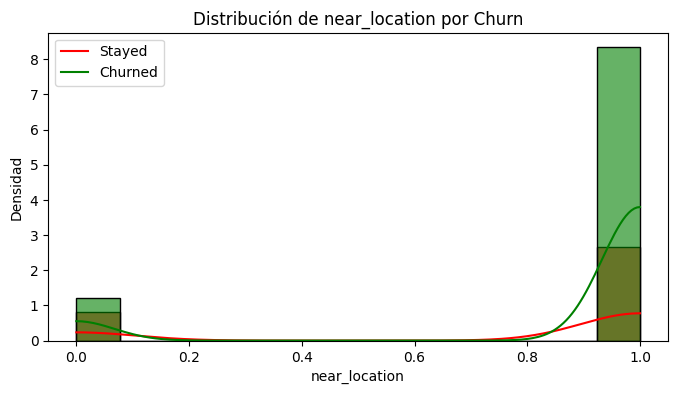

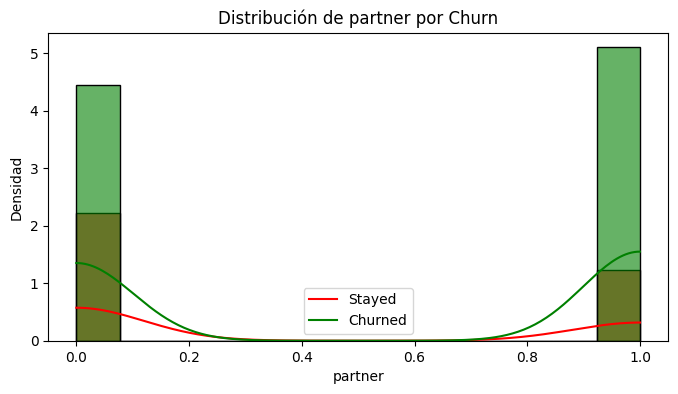

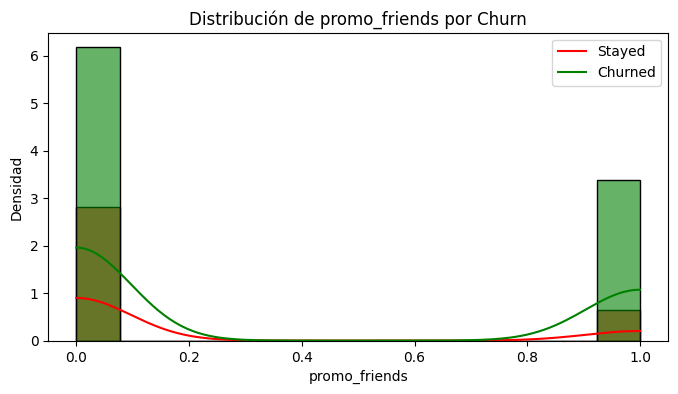

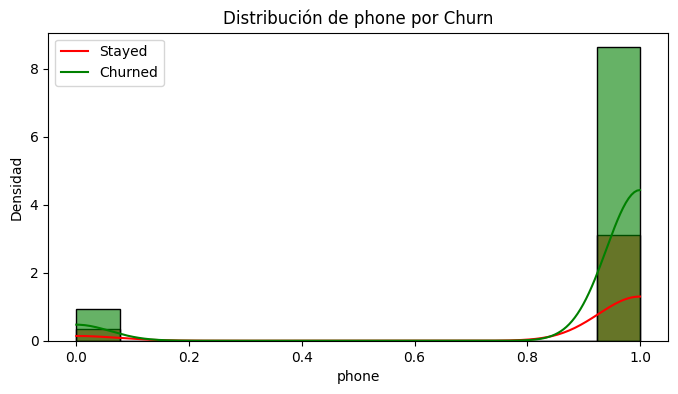

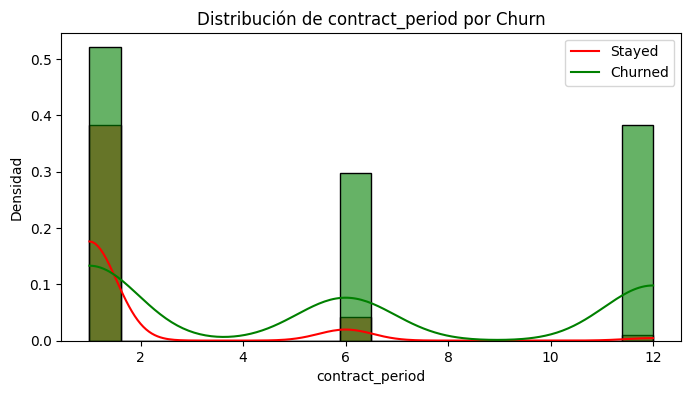

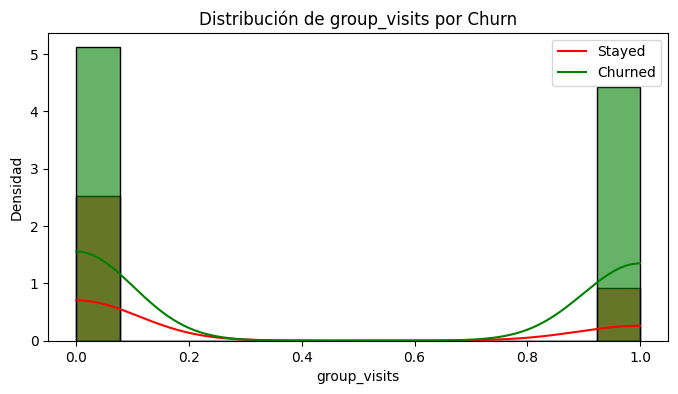

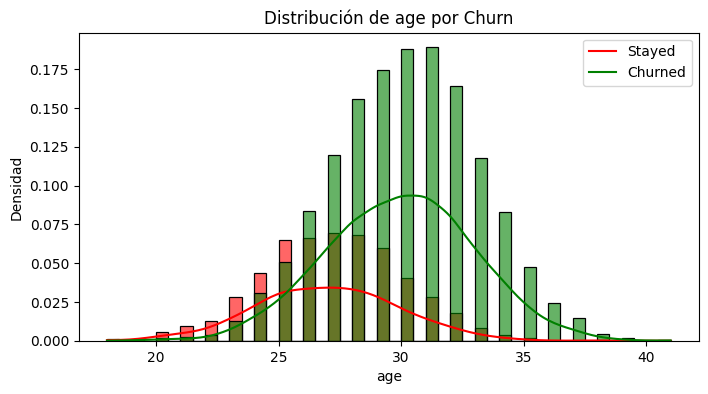

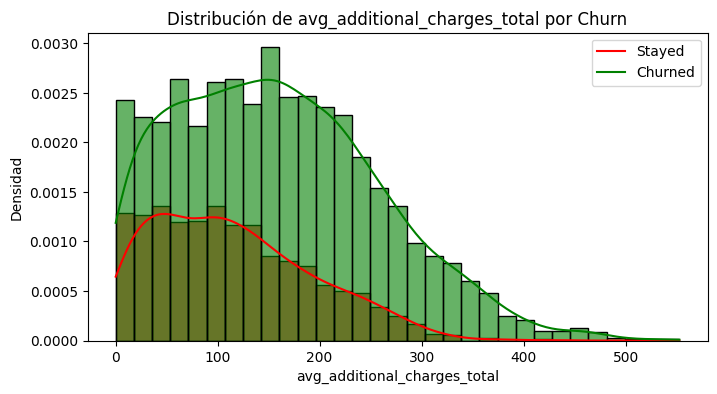

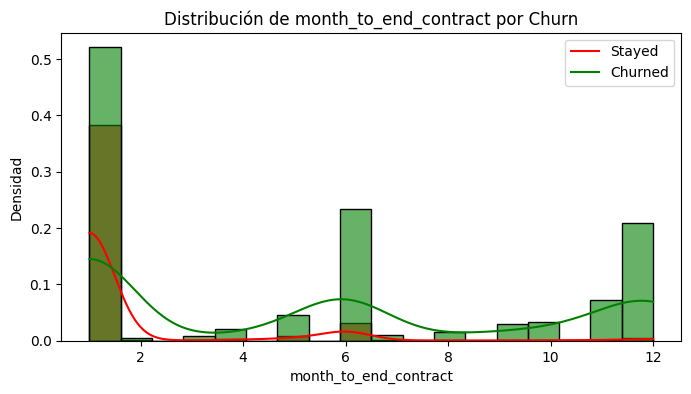

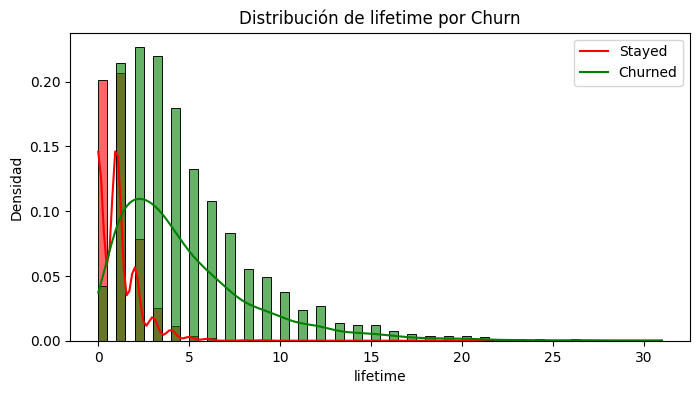

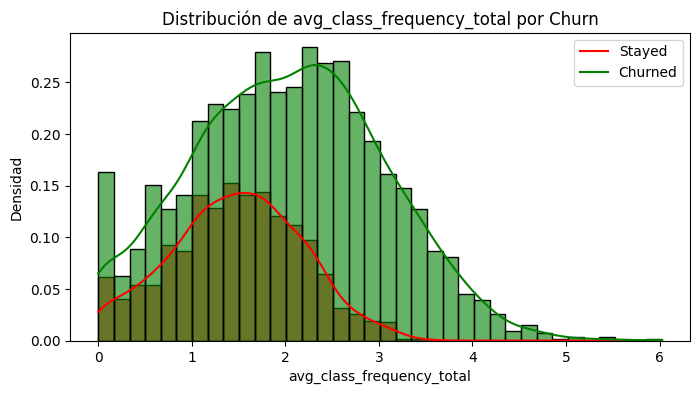

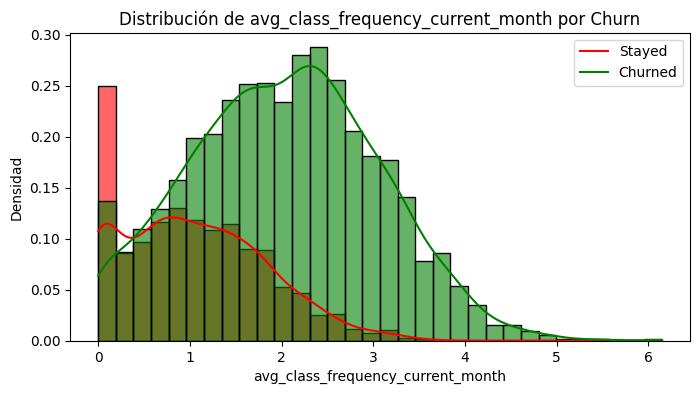

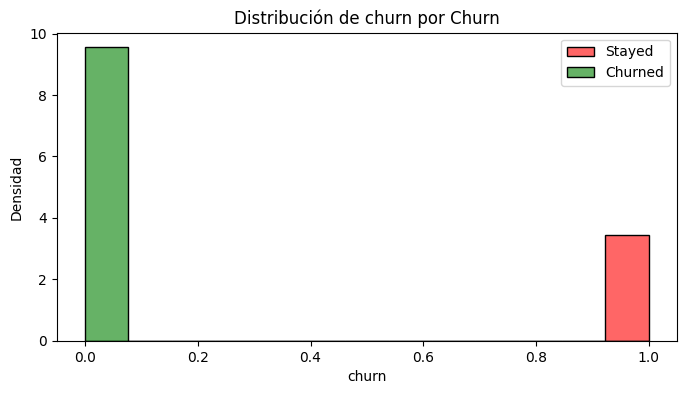

In [12]:
#Visualizar distribución de datos por columna

for variable in variables: 
    plt.figure(figsize=(8, 4))
    
    # Histograma con densidad para cada grupo
    sns.histplot(data=gym, x=variable, hue='churn', kde=True, 
                 stat="density", alpha=0.6, palette={0: "green", 1: "red"})
    
    # Configurar el gráfico
    plt.title(f"Distribución de {variable} por Churn")
    plt.xlabel(variable)
    plt.ylabel("Densidad")
    plt.legend(labels=["Stayed", "Churned"])
    plt.show()

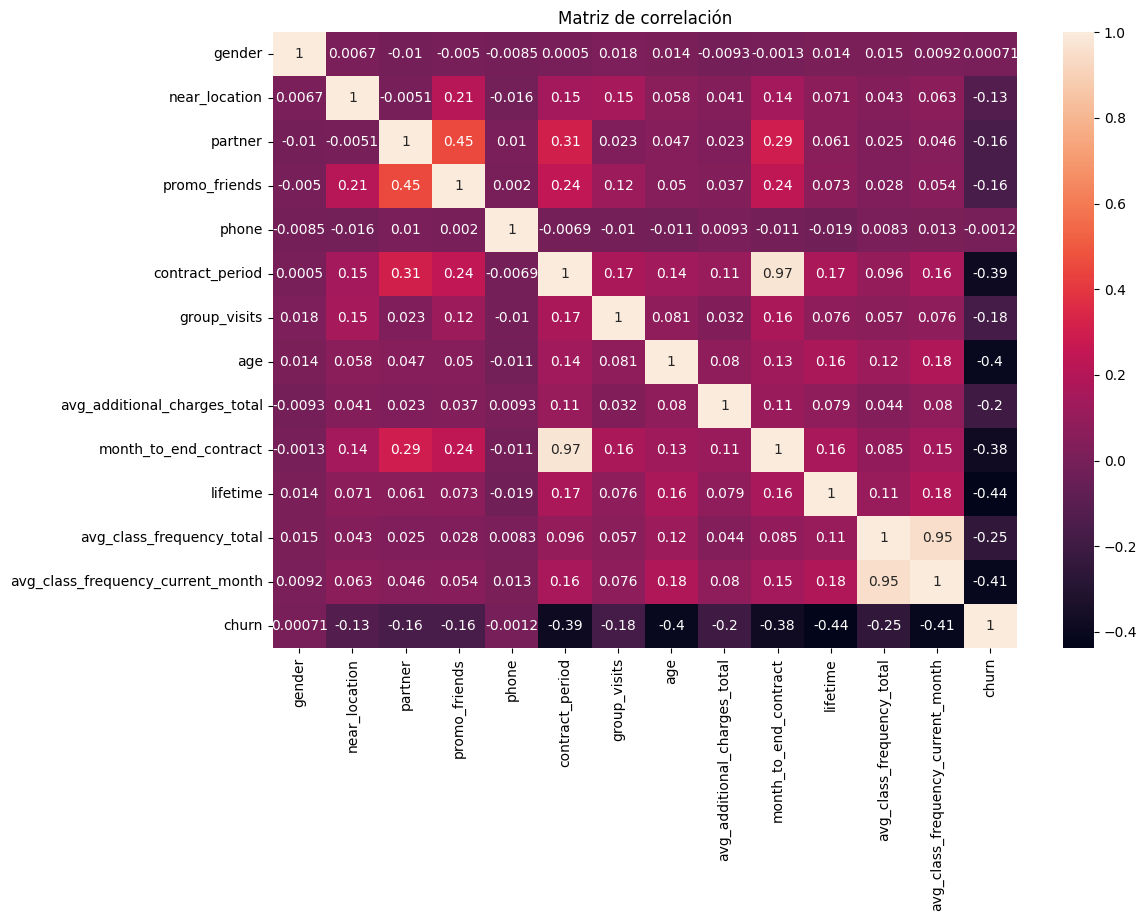

In [13]:
#Crear mapa de calor para matriz de correlación 

plt.figure(figsize=(12, 8))
sns.heatmap(gym.corr(), annot=True)

plt.title('Matriz de correlación')

plt.show()

### Resultados
Se exploran los datos dividiéndolos en dos grupos: clientes que permanecen en el gimnasio y aquellos que no. Los gráficos de distribución revelan las siguientes tendencias: 
    a) La cantidad de hombres y mujeres es similar, y ambos se comportan de manera idéntica en cuanto a quedarse o irse.
    b) Los que viven más lejos tienen mayor probabilidad de quedarse.
    c) Aquellos que ingresan sin algún tipo de descuento tienen un porcentaje mejor de estadía.
    d) Registrar o no el teléfono no tiene mayor incidencia en la decisión de seguir o no con la membresía.
    e) A mayor duración de contrato, menos personas deciden seguir inscritas.
    f) Quienes no realizan visitas en grupo tienen mayor tasa de retención.
    g) El rango de edad de las personas que desisten del gimnasio es mayor.
    h) El promedio de gasto de los clientes que se quedan es menor que el de aquellos que se van.
    i) La mayoría de los clientes que abandonaron tuvieron un tiempo de vida como cliente muy corto.
    j) El porcentaje de personas que desisten de seguir con el contrato es mayor que el de aquellos clientes que se quedan.


## Crear modelo para predicción de cancelación membresía 

In [14]:
#Extraer valores y variable
valores = gym.drop(columns='churn', axis=1)
variable = gym['churn']

In [15]:
#Generar datos para entrenamiento y validación
valores_entrenamiento, valores_validacion, variable_entrenamiento, variable_validacion = train_test_split(valores, variable, test_size=0.2, random_state=7)

In [16]:
#Guardar modelo de Regresión Lineal 
modelo_rl = LogisticRegression()

In [17]:
#Entrenar modelo 
modelo_rl.fit(valores_entrenamiento, variable_entrenamiento)

c:\Users\Lenovo\Desktop\TripleTen\Ambientes_virtuales_Proyectos\venv_13\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#Generar predicciones
prediccion_prob = modelo_rl.predict_proba(valores_validacion)
prediccion = modelo_rl.predict(valores_validacion)

In [19]:
#Calcular métricas de evaluación

rl_accuracy = accuracy_score(variable_validacion, prediccion)
rl_precision = precision_score(variable_validacion, prediccion)
rl_recall = recall_score(variable_validacion, prediccion)

print('La exactitud del modelo logístico es: {:.2f}'.format(rl_accuracy))
print('La precisión del modelo logístico es: {:.2f}'.format(rl_precision))
print('La recuperación del modelo logístico es: {:.2f}'.format(rl_recall))

La exactitud del modelo logístico es: 0.91
La precisión del modelo logístico es: 0.87
La recuperación del modelo logístico es: 0.78


### Resultados
El modelo creado es fiable para poder clasificar a los clientes.

## Crear clusters de usuarios

In [20]:
 #Estandarizar datos
sc = StandardScaler()

In [21]:
#Entrenar modelo con datos estandarizados
modelo_rl_sc = sc.fit_transform(valores) 

In [22]:
#Calcular matriz de distancias
linked = linkage(modelo_rl_sc, method = 'ward')

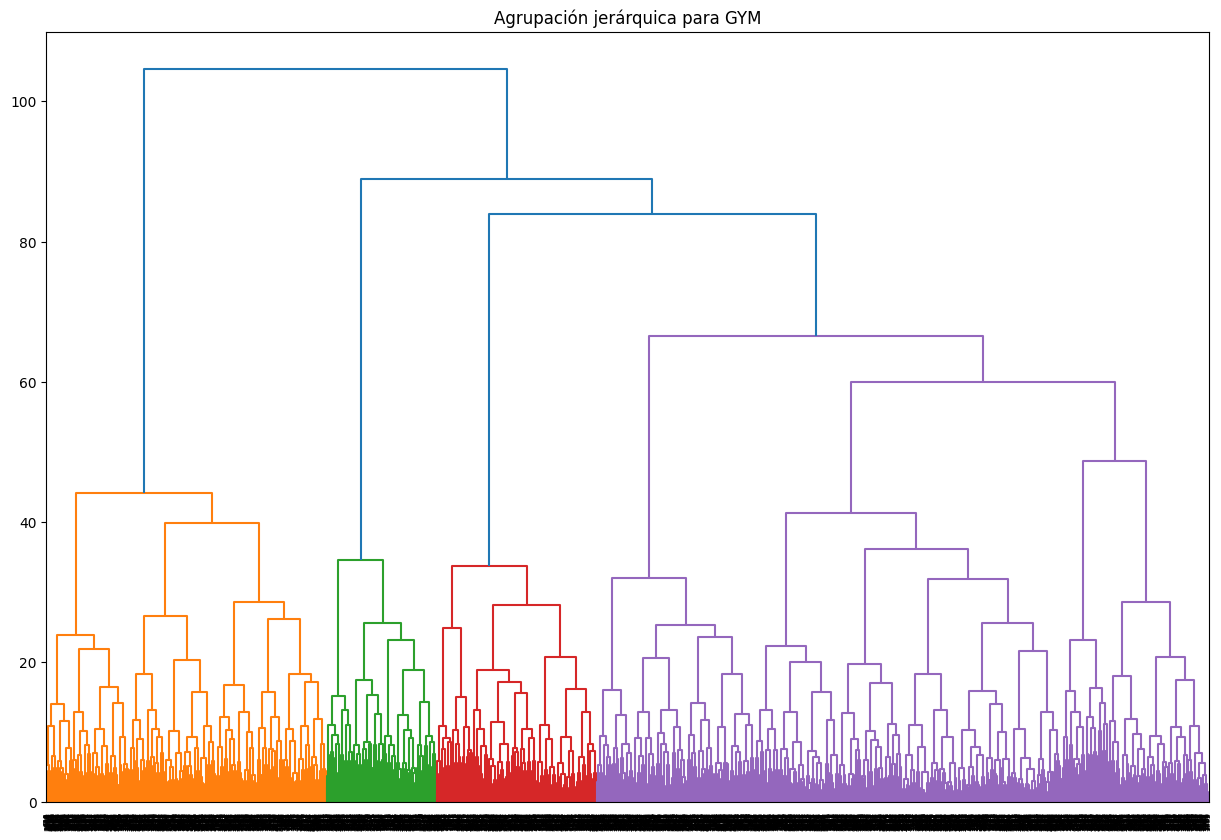

In [23]:
#Visualizar dendograma
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

In [24]:
#Agrupar datos
valores_km = KMeans(n_clusters=5)
etiquetas = valores_km.fit_predict(valores) 

In [25]:
#Agregar cluster determinado a cada cliente
gym['cluster'] = etiquetas

In [26]:
#Calcular media de los clusters
promedio_cluster = gym.groupby('cluster').mean()
promedio_cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.523659,0.842271,0.495268,0.328076,0.905363,4.823344,0.423764,29.378549,181.085367,4.445846,3.774974,1.893321,1.787603,0.220820
1,0.510638,0.825162,0.489362,0.290472,0.903793,4.241443,0.390379,28.916744,37.267884,3.893617,3.389454,1.836156,1.691475,0.346901
2,0.522321,0.883929,0.514881,0.348214,0.904762,5.421131,0.430060,29.352679,258.455922,5.008929,4.184524,1.930109,1.875233,0.172619
3,0.501406,0.839738,0.451734,0.280225,0.898782,4.259606,0.404873,28.990628,110.528551,3.962512,3.578257,1.849971,1.707197,0.329897
4,0.458515,0.864629,0.519651,0.327511,0.912664,5.960699,0.449782,30.048035,365.326646,5.502183,4.432314,2.007396,1.999896,0.034934


In [27]:
gym.groupby('cluster').count()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,951,951,951,951,951,951,951,951,951,951,951,951,951,951
1,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081
2,672,672,672,672,672,672,672,672,672,672,672,672,672,672
3,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067
4,229,229,229,229,229,229,229,229,229,229,229,229,229,229


In [28]:
gym.groupby('cluster').sum()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,498,801,471,312,861,4587,403,27939,172212.183645,4228.0,3590,1800.548702,1700.010575,210
1,552,892,529,314,977,4585,422,31259,40286.582635,4209.0,3664,1984.884428,1828.484217,375
2,351,594,346,234,608,3643,289,19725,173682.379464,3366.0,2812,1297.033433,1260.156529,116
3,535,896,482,299,959,4545,432,30933,117933.963603,4228.0,3818,1973.918678,1821.579691,352
4,105,198,119,75,209,1365,103,6881,83659.801890,1260.0,1015,459.693609,457.976275,8


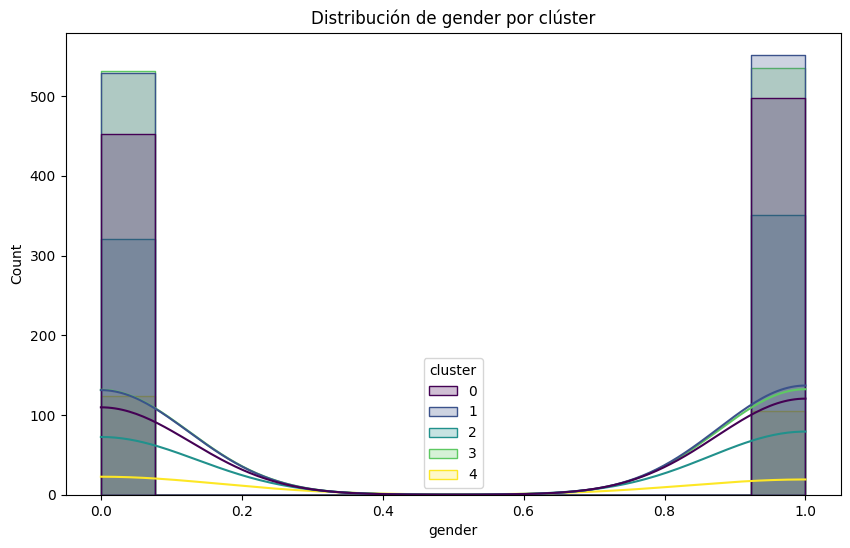

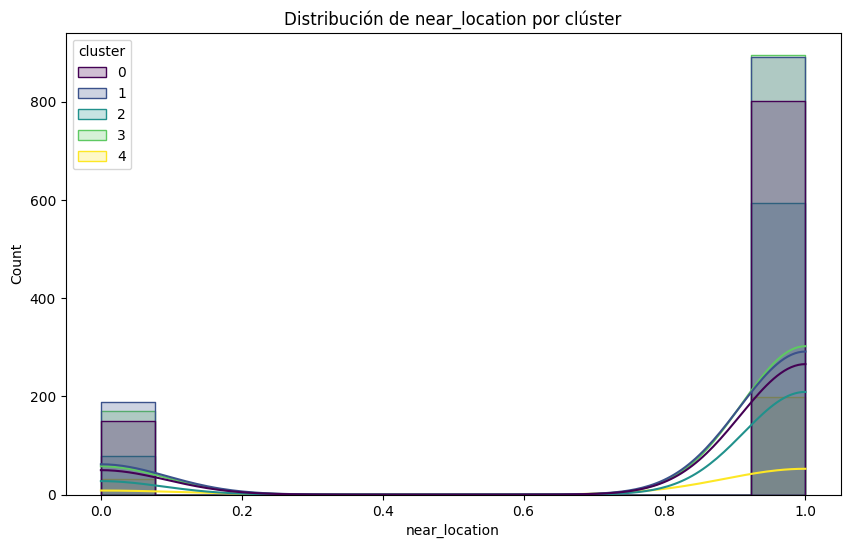

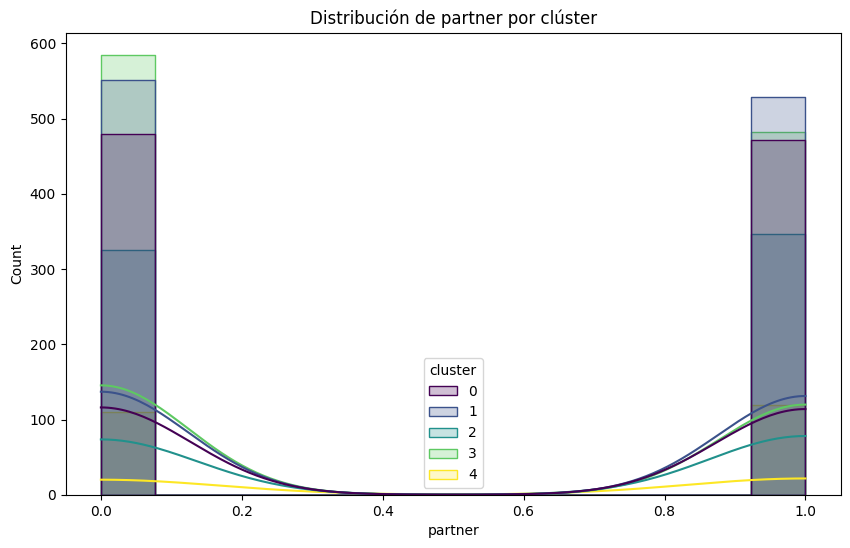

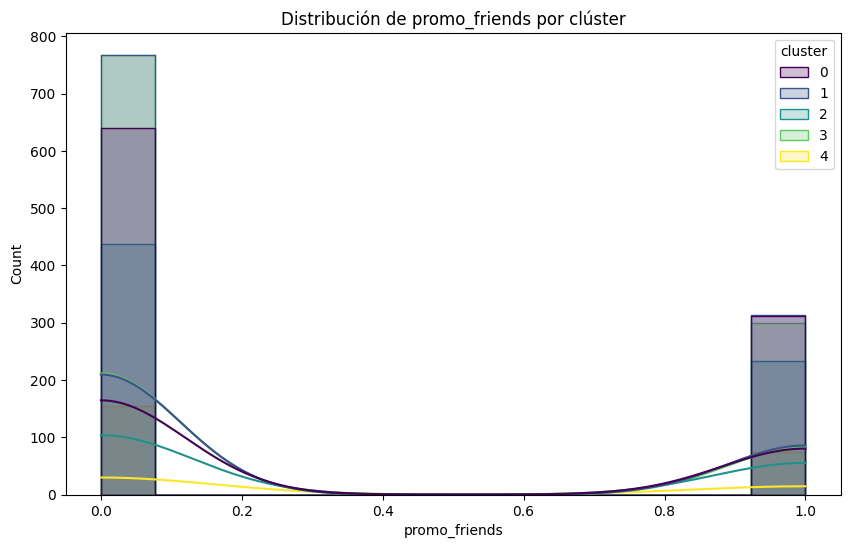

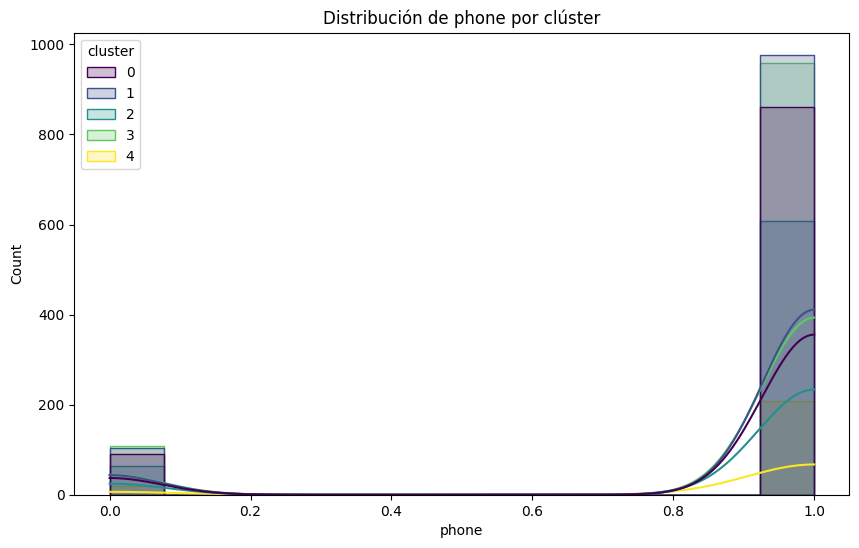

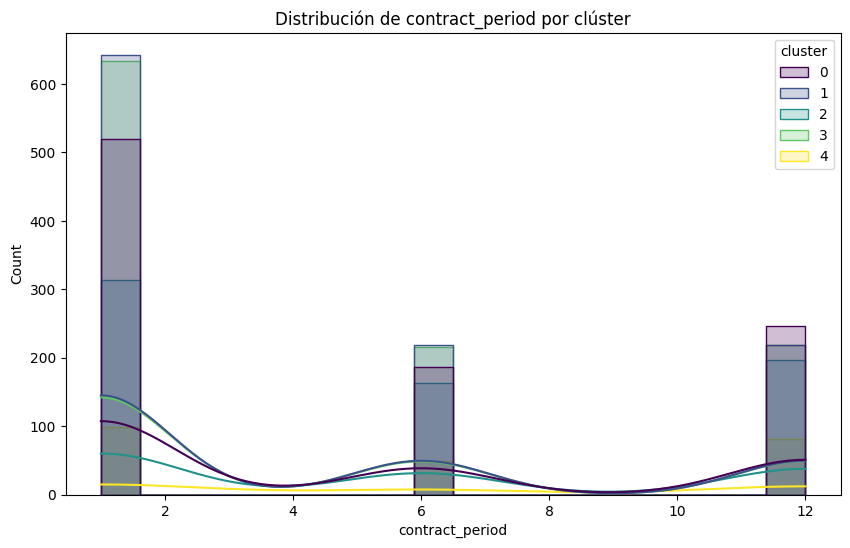

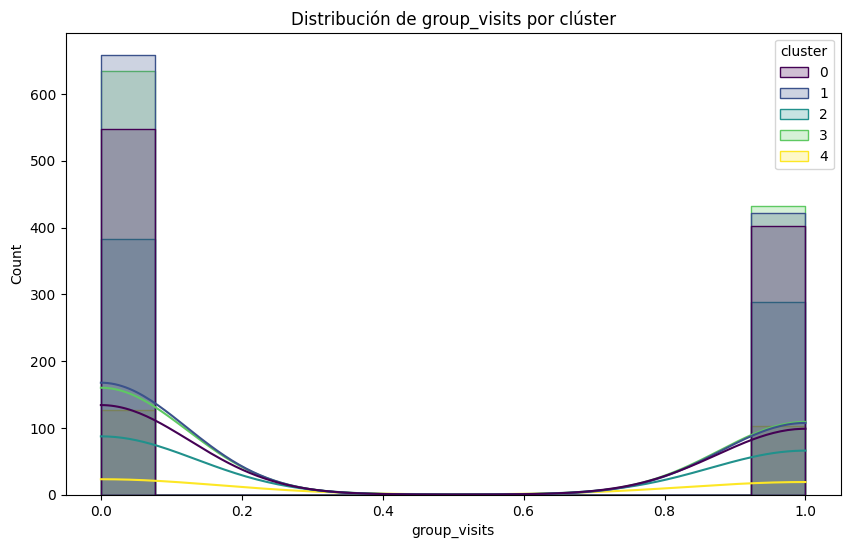

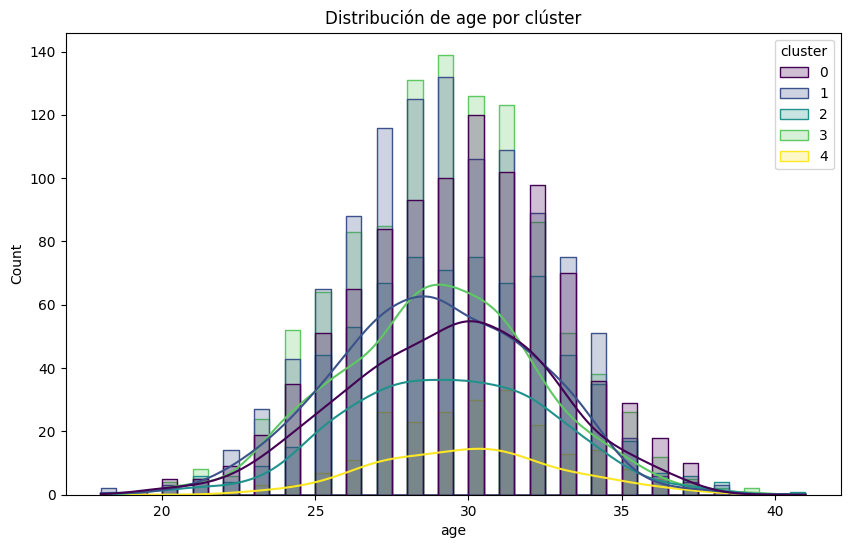

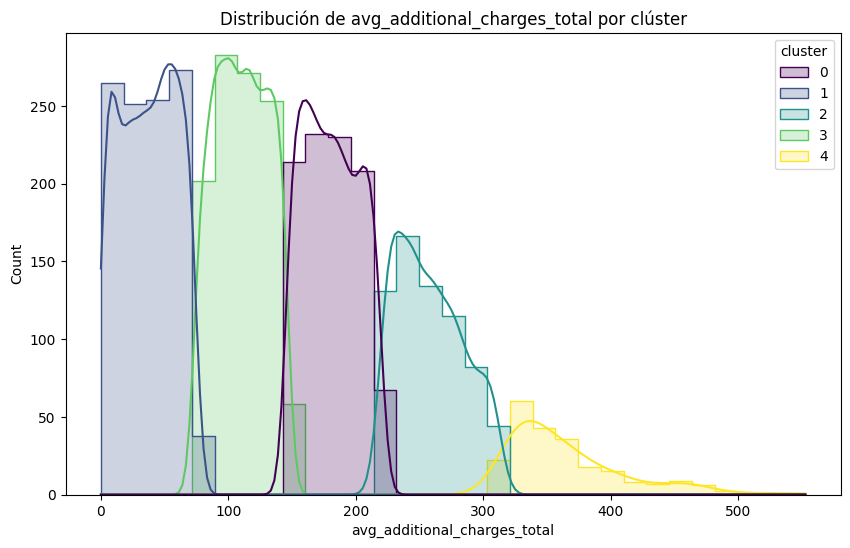

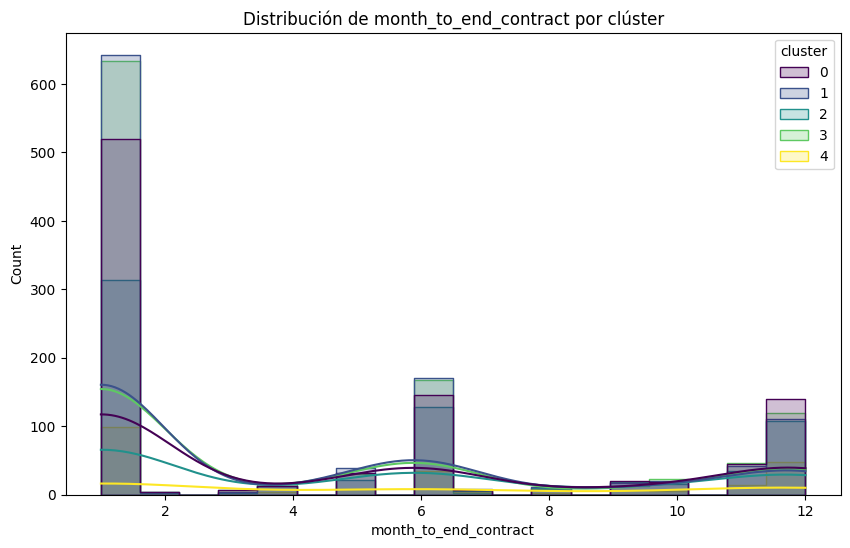

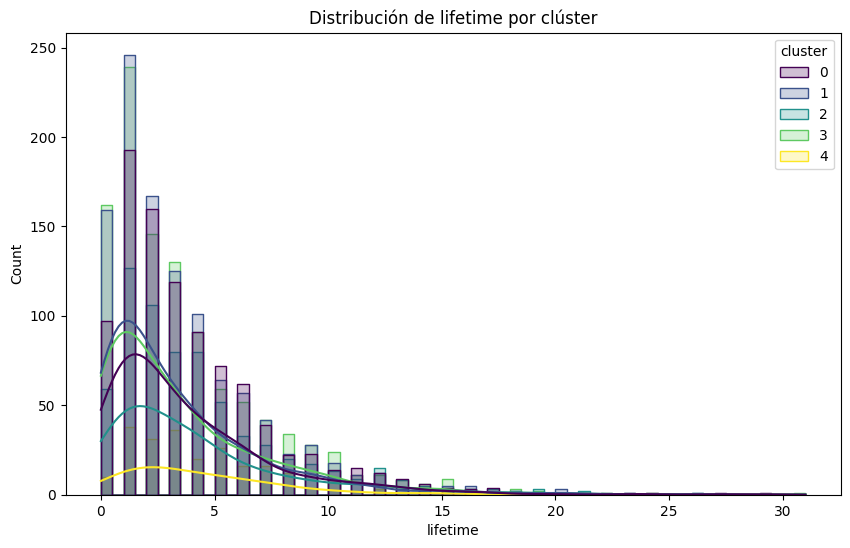

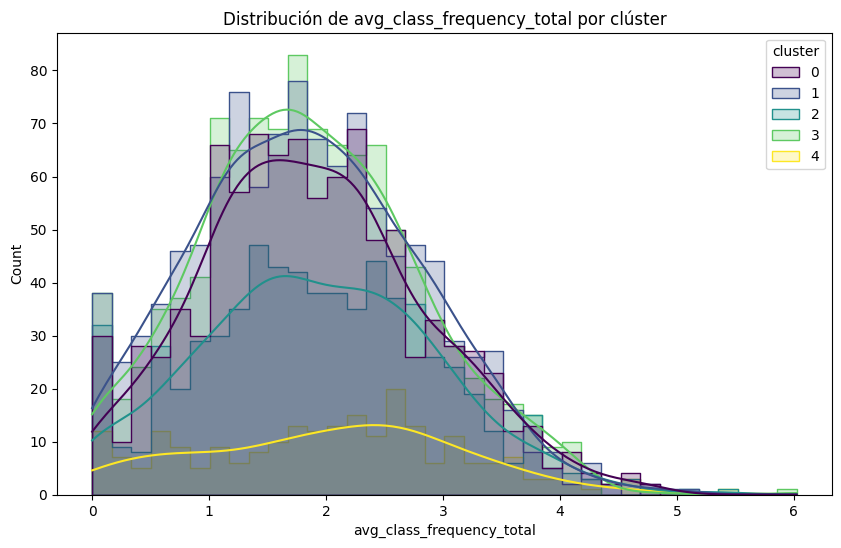

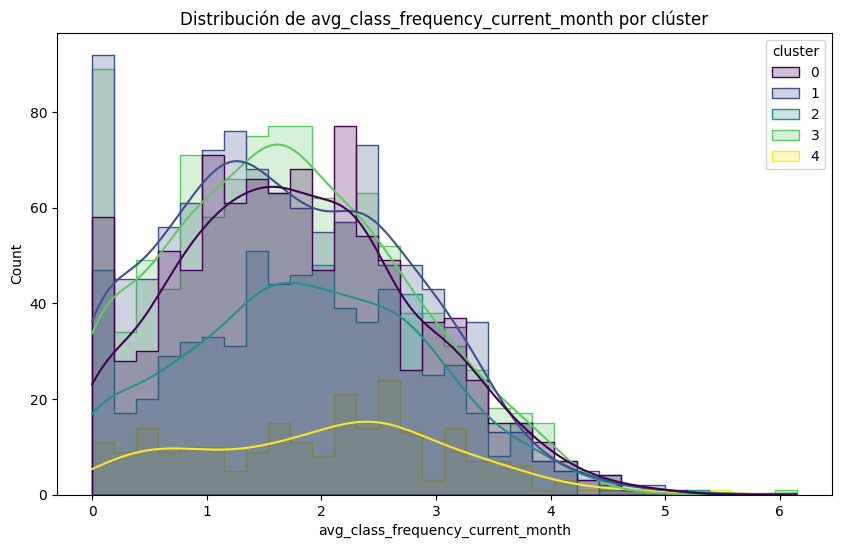

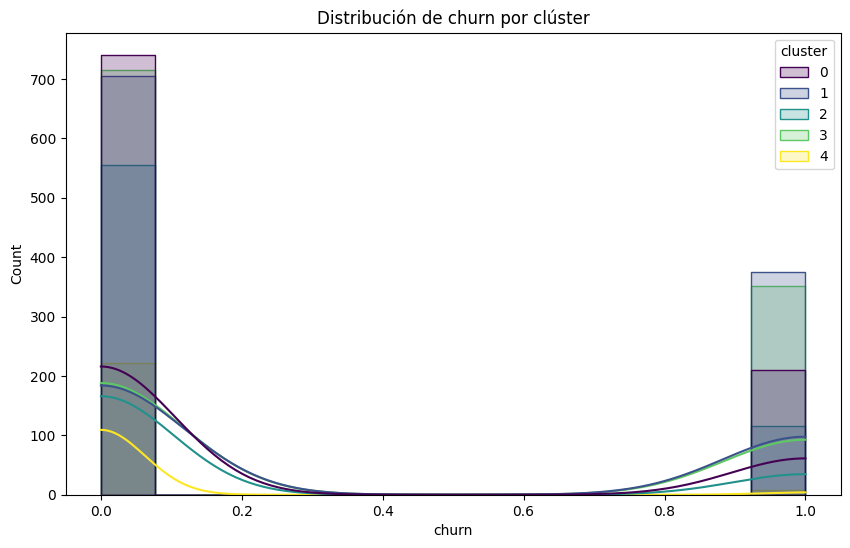

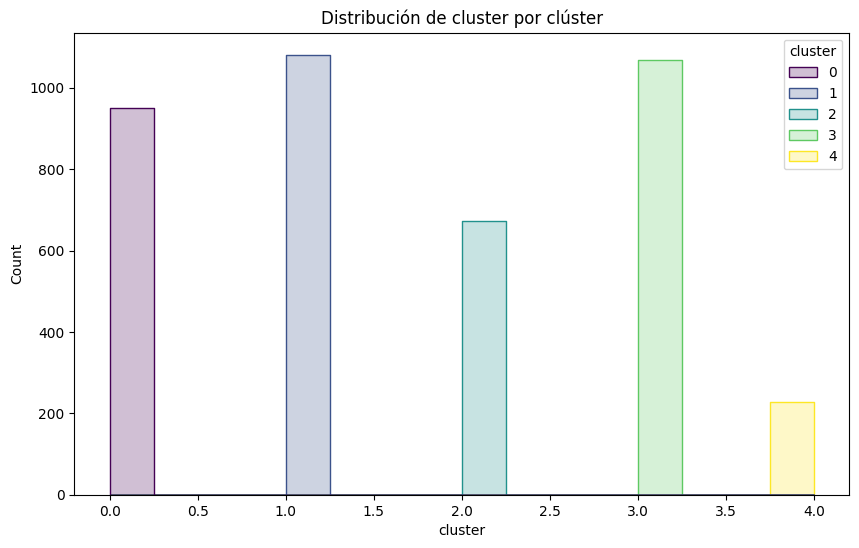

In [29]:
#Visualizar distribución de los valores por clúster
for column in gym:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=gym, x=column, hue='cluster', kde=True, palette='viridis', element='step')
    plt.title(f'Distribución de {column} por clúster')
    plt.show()

In [30]:
#Calcular tasa de cancelación para cada clúster

cluster_churn_rate = gym.groupby('cluster')['churn'].mean()
cluster_churn_rate 

cluster
0    0.220820
1    0.346901
2    0.172619
3    0.329897
4    0.034934
Name: churn, dtype: float64

## Conclusiones
Se utilizó el método *linkage* para crear un dendrograma basado en los datos de la tabla `gym`, lo cual permitió identificar la existencia de cinco tipos de clientes. La distribución de los clientes entre los grupos es la siguiente: 

- **Grupos 0, 2 y 4:** Tienen tamaños similares, con entre 960 y 1013 clientes cada uno.  
- **Grupo 3:** Más reducido, con aproximadamente 741 clientes.  
- **Grupo 1:** Significativamente menor, con solo 294 clientes.  

Aunque las proporciones de las distintas variables son similares entre los grupos, se observa una diferencia notable en los cargos adicionales realizados por cada uno.

### Estrategias de marketing propuestas

#### 1. Estrategias para los grupos más grandes (0, 2 y 4)  
Estos grupos son los más numerosos y presentan comportamientos similares que podrían ser indicadores de deserción, como ingresar con promociones o asistir en grupo. Además, concentran un alto porcentaje de clientes con tiempos de vida más cortos y realizan menores gastos adicionales.  

- **Propuesta:**  
  Ofrecer descuentos mensuales para incentivar la permanencia, de manera que los clientes sientan que obtienen un mayor valor por su membresía. Esto responde a su necesidad de acceder al gimnasio a un costo menor.  
- **Enfoque adicional:**  
  Diseñar campañas de retención específicas que destaquen los beneficios de comprometerse a largo plazo, como promociones para contratos semestrales o anuales.  

---

#### 2. Estrategias para los grupos con mayor gasto (1 y 3)  
Estos grupos destacan por realizar mayores gastos adicionales, lo que sugiere un interés en servicios de mayor calidad y exclusividad.  

- **Propuesta:**  
  Ofrecer servicios exclusivos, como acceso prioritario a clases, entrenadores personales o paquetes de bienestar (masajes, análisis corporales, etc.), como incentivos para renovar su membresía.  
- **Enfoque adicional:**  
  Implementar programas personalizados que refuercen su percepción de valor agregado.  

---

#### 3. Incentivar la constancia en todos los grupos  
La mayoría de los clientes de todos los grupos toman en promedio entre 0 y 3 clases mensuales, lo que indica baja frecuencia de visitas.  

- **Propuesta:**  
  Crear un programa de recompensas que premie la constancia, incentivando al menos una visita semanal al gimnasio. Los beneficios podrían reflejarse en el siguiente mes mediante descuentos, accesos especiales o regalos.  

---

#### 4. Fomentar la asistencia de clientes cercanos  
A pesar de vivir cerca del gimnasio, estos clientes presentan una alta tasa de abandono.  

- **Propuesta:**  
  Enviar recordatorios personalizados para motivar la asistencia, por ejemplo:  
  _“Hoy es un buen día para ejercitarte. Ven a [Nombre del gimnasio], estamos a solo X minutos. ¡Te esperamos!”_  
- **Enfoque adicional:**  
  Implementar actividades locales como eventos grupales, clases especiales o retos semanales para reforzar su vínculo con el gimnasio.  

---

Estas estrategias están orientadas a fortalecer la interacción y retención de clientes, considerando las características particulares de cada grupo y los patrones detectados en los datos.